In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Load dataset
df = pd.read_csv("Influencers Data.csv")
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [25]:
# Missing Values
print(df.isnull().sum())
df = df.dropna()


rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64


In [33]:
# Data Cleaning And Preprocessing
def convert_to_number(value):
    if isinstance(value, str):
        value = value.replace(',', '')
        if 'k' in value:
            return float(value.replace('k','')) * 1_000
        elif 'm' in value:
            return float(value.replace('m','')) * 1_000_000
        elif 'b' in value:
            return float(value.replace('b','')) * 1_000_000_000
    return value

df['followers'] = df['followers'].apply(convert_to_number)
df['avg_likes'] = df['avg_likes'].apply(convert_to_number)
df['posts'] = df['posts'].apply(convert_to_number)


In [34]:
# EDA

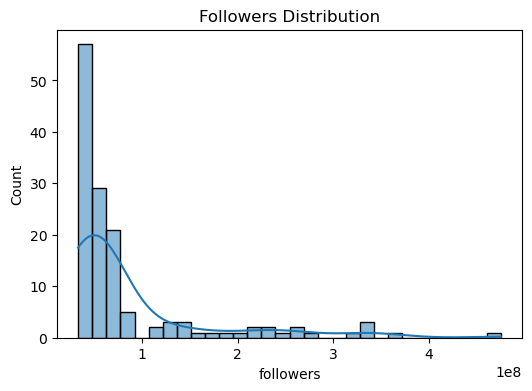

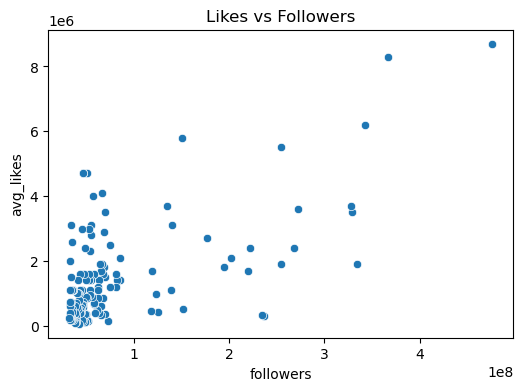

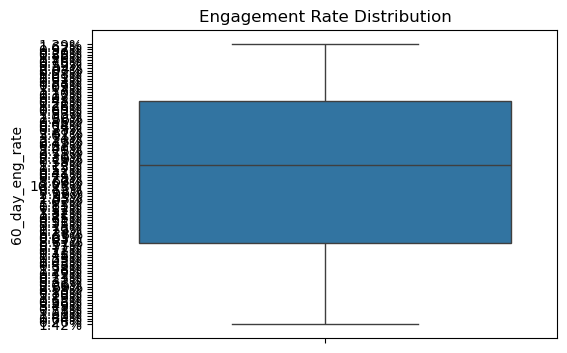

In [35]:
# Followers Distribution 
plt.figure(figsize=(6,4))
sns.histplot(df['followers'], bins=30, kde=True)
plt.title("Followers Distribution")
plt.show()

# Likes vs Followers
plt.figure(figsize=(6,4))
sns.scatterplot(x='followers', y='avg_likes', data=df)
plt.title("Likes vs Followers")
plt.show()

# Engagement Rate Analysis
plt.figure(figsize=(6,4))
sns.boxplot(y='60_day_eng_rate', data=df)
plt.title("Engagement Rate Distribution")
plt.show()


In [36]:
# Features and target
X = df[['followers', 'posts', 'avg_likes']]
y = df['influence_score']

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [38]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
# Prediction
y_pred = model.predict(X_test)

In [40]:
# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 21.402461427560176
R2 Score: 0.17370710793287159


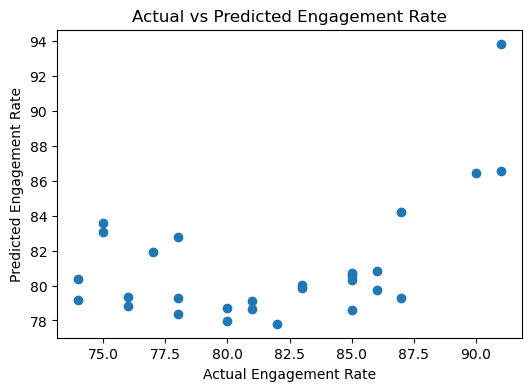

In [41]:
# Actual vs Predicted Plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Engagement Rate")
plt.ylabel("Predicted Engagement Rate")
plt.title("Actual vs Predicted Engagement Rate")
plt.show()
